# Importing and cleaning data

## Import libraries and data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import os

In [4]:
# Import data
path = r'/Users/World University Rankings'
df_times = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'timesData copy.csv'))
df_cwur = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'cwurData copy.csv'))

## Check for consistency and missing values

In [6]:
df_times.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [7]:
df_cwur.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [8]:
df_times.shape

(2603, 14)

In [9]:
df_cwur.shape

(2200, 14)

In [10]:
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [11]:
df_cwur.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [12]:
# Missing values
df_times.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [13]:
# Missing values
df_cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [14]:
# Check duplicates
df_times.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2598    False
2599    False
2600    False
2601    False
2602    False
Length: 2603, dtype: bool

In [15]:
# Check duplicates
df_cwur.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

## Cleaning data

In [17]:
# Clean world_rank values
def clean_world_rank(value):
    if isinstance(value, str):  
        value = value.replace("=", "")  
        if "-" in value:  
            first, last = value.split("-")  
            return (int(first) + int(last)) / 2  
        return int(value) 
    return value  
    
# Apply function
df_times["world_rank"] = df_times["world_rank"].apply(clean_world_rank)

In [18]:
# Rename columns in df_times
df_times = df_times.rename(columns={
    "university_name": "institution",
    "total_score": "score",
    "num_students": "students",
    "international_students": "international_percent",
    "student_staff_ratio": "student_staff"
})

In [19]:
# Rename "United States of America" to "USA"
df_times["country"] = df_times["country"].replace("United States of America", "USA")

In [20]:
# Replace missing values in 'score' from df_cwur
# Convert "-" to None in the score column
df_times["score"] = df_times["score"].replace("-", None)

# Merge df_times_score with df_cwur on institution, country, and year
df_times = df_times.merge(df_cwur[["institution", "country", "year", "score"]], 
                                      on=["institution", "country", "year"], 
                                      how="left", 
                                      suffixes=("_times", "_cwur"))

# Replace missing values in 'score' with 'score_cwur' from df_cwur
df_times["score"] = df_times["score_times"].fillna(df_times["score_cwur"])

# Drop the extra score column from df_cwur
df_times = df_times.drop(columns=["score_cwur", "score_times"])

# Convert 'score' to numeric
df_times["score"] = pd.to_numeric(df_times["score"], errors="coerce")

# Fill remaining missing values the median score
df_times["score"] = df_times["score"].fillna(df_times["score"].median())

In [21]:
# Fill missing values with the median of 'students'
df_times["students"] = df_times["students"].replace(",", ".", regex=True).astype(float)
df_times["students"] = df_times["students"].fillna(df_times["students"].median())

In [22]:
# Fill missing values with median of 'international_percent'
df_times['international_percent'] = df_times['international_percent'].astype(str)
df_times['international_percent'] = df_times['international_percent'].str.replace('%', '', regex=True).astype(float)
df_times['international_percent'] = df_times['international_percent'].fillna(df_times['international_percent'].median())

In [23]:
# Fill missing values  with the median of 'student_staff_ratio'
df_times['student_staff'] = df_times['student_staff'].fillna(df_times['student_staff'].median())

In [24]:
# Fill missing values with the median of 'female_male_ratio'
# Split the 'female_male_ratio' column into: 'female_ratio' and 'male_ratio'
df_times[['female_ratio', 'male_ratio']] = df_times['female_male_ratio'].str.split(':', expand=True)

# Convert columns to numeric values
df_times['female_ratio'] = pd.to_numeric(df_times['female_ratio'], errors='coerce')
df_times['male_ratio'] = pd.to_numeric(df_times['male_ratio'], errors='coerce')

# Replace missing values with the median
df_times['female_ratio'] = df_times['female_ratio'].fillna(df_times['female_ratio'].median())
df_times['male_ratio'] = df_times['male_ratio'].fillna(df_times['male_ratio'].median())

# Drop 'female_male_ratio' 
df_times.drop(columns=['female_male_ratio'], inplace=True)

## Descriptive statistics

In [27]:
# Descriptive statistics
df_times_numeric = df_times.select_dtypes(include=['number'])

# Display descriptive statistics for all numeric columns
print("Descriptive Statistics:\n", df_times_numeric.describe())

# Summary statistics for all numeric columns
mean_values = df_times_numeric.mean()
median_values = df_times_numeric.median()
std_values = df_times_numeric.std()
min_values = df_times_numeric.min()
max_values = df_times_numeric.max()

Descriptive Statistics:
         world_rank     teaching     research    citations     students  \
count  2603.000000  2603.000000  2603.000000  2603.000000  2603.000000   
mean    253.930657    37.801498    35.910257    60.921629    24.456675   
std     186.185879    17.604218    21.254805    23.073219    25.797454   
min       1.000000     9.900000     2.900000     1.200000     1.211000   
25%     109.000000    24.700000    19.600000    45.500000    12.830000   
50%     213.000000    33.900000    30.500000    62.500000    20.925000   
75%     325.500000    46.400000    47.250000    79.050000    29.874000   
max     700.500000    99.700000    99.400000   100.000000   769.000000   

       student_staff  international_percent         year        score  \
count    2603.000000            2603.000000  2603.000000  2603.000000   
mean       18.392124              15.381099  2014.075682    55.190934   
std        11.333420              10.461377     1.685733     9.935753   
min         0.60

In [28]:
# Save df_times as a CSV
df_times.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'df_times.csv'), index=False)

# Exploring Relationships

### Correlation Matrix

#### What are the key factors that influence university rankings?

##### Key factors like research, teaching, and citations have the strongest influence on university rankings.

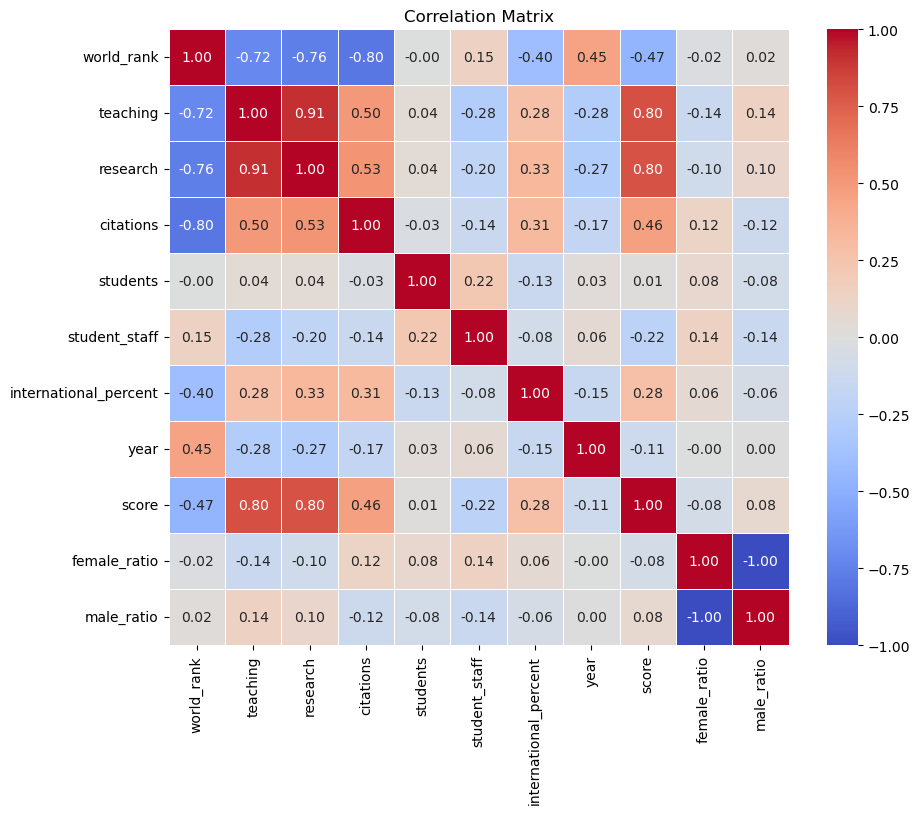

In [33]:
# Correlation matrix as a heatmap
# Select numeric columns
numeric_columns = df_times.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plott the correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Pair plot for world rank, research, teaching and citations

##### How do university rankings relate to research, teaching, and citations?

##### Universities with better rankings perform better in research, teaching, and citations, while universities worse rankings tend to have lower scores in these areas.

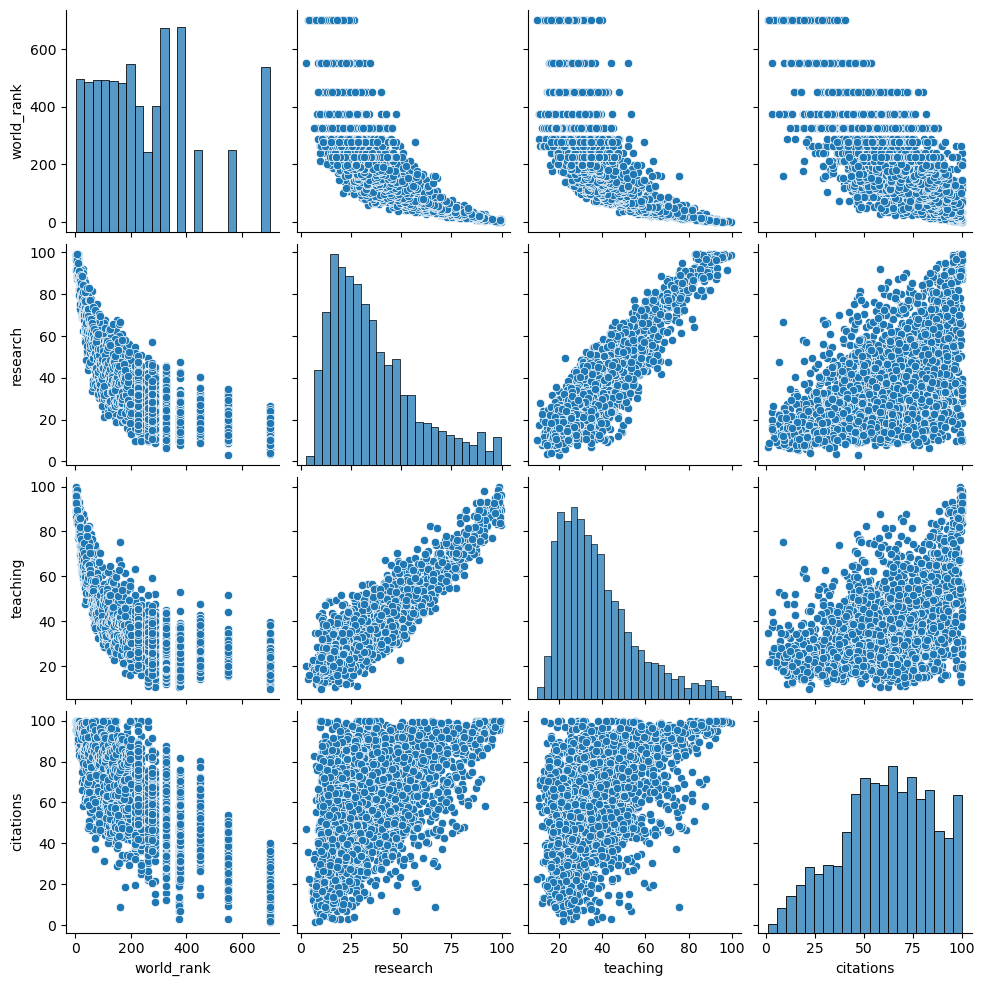

In [37]:
# Select the relevant columns for pair plot
pairplot_columns = ['world_rank', 'research', 'teaching', 'citations']

# Create the pairplot
sns.pairplot(df_times[pairplot_columns])

# Show the plot
plt.show()

### Histogram scores distribution

#### What the distribution of university scores shows?

##### The distribution is right-skewed, meaning fewer universities have higher scores, but those that do stand out significantly. 

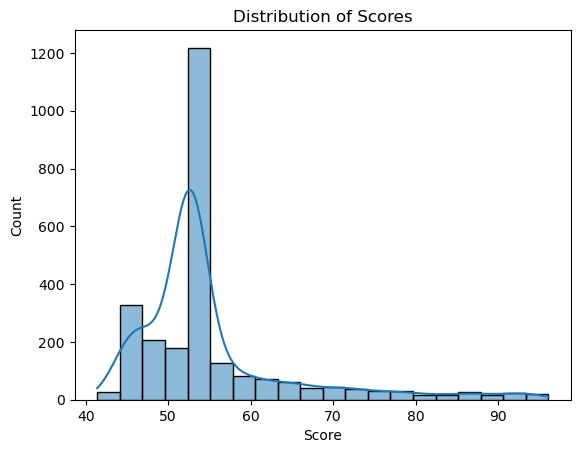

In [41]:
# Create a histogram for the 'score' column
sns.histplot(df_times['score'], bins=20, kde=True)

# Set labels
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')

# Show plot
plt.show()

### Scatterplots for gender ratios

#### How do gender ratios impact university rankings?

##### The gender distribution doesn't show a consistent pattern across different world ranks.

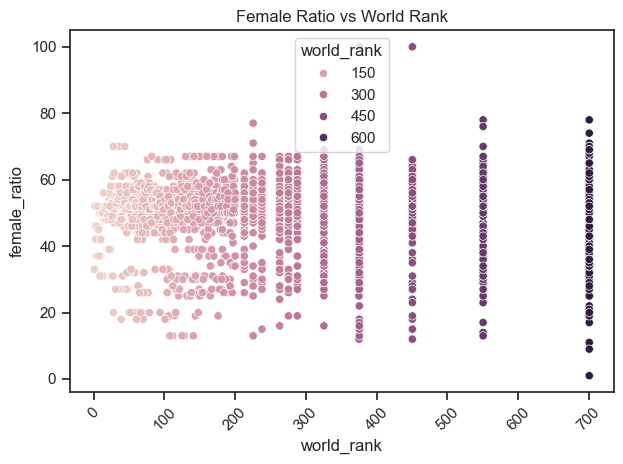

In [44]:
# Scatterplot for female ratio
sns.set(style="ticks")
g = sns.scatterplot(x="world_rank", y="female_ratio", hue="world_rank", data=df_times)

# Set plot title
plt.title('Female Ratio vs World Rank')

# Improve axis labels
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

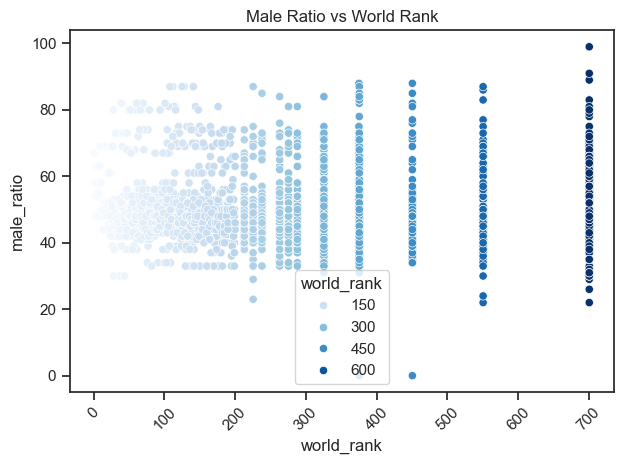

In [45]:
# Scatterplot for male ratio
sns.set(style="ticks")
g = sns.scatterplot(x="world_rank", y="male_ratio", hue="world_rank", data=df_times, palette="Blues")

# Set plot title
plt.title('Male Ratio vs World Rank')

# Improve axis labels
plt.xticks(rotation=45)  
plt.tight_layout()

# Show the plot
plt.show()

### Scatterplot number of students vs world rank

#### How does the number of students correlate with world rankings?

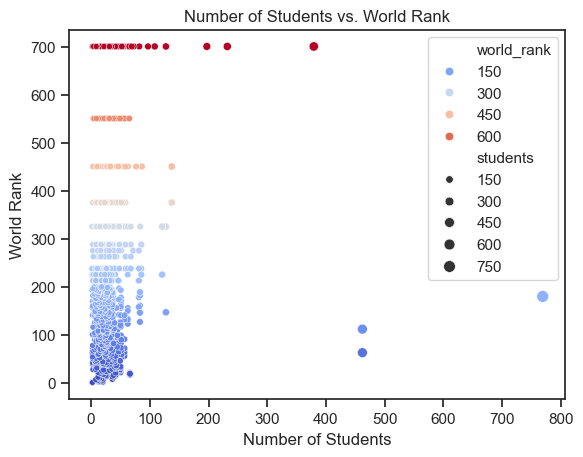

In [46]:
sns.scatterplot(data=df_times, x="students", y="world_rank", hue="world_rank", palette="coolwarm", size="students")
plt.title("Number of Students vs. World Rank")
plt.xlabel("Number of Students")
plt.ylabel("World Rank")
plt.show()

### Histogram top 5 countries by research score

#### How does research score distribution vary across the top 5 countries?

##### The USA has the highest concentration of research scores, Switzerland has a similar but lower peak, while other countries like Hong Kong and Singapore show more varied distributions.

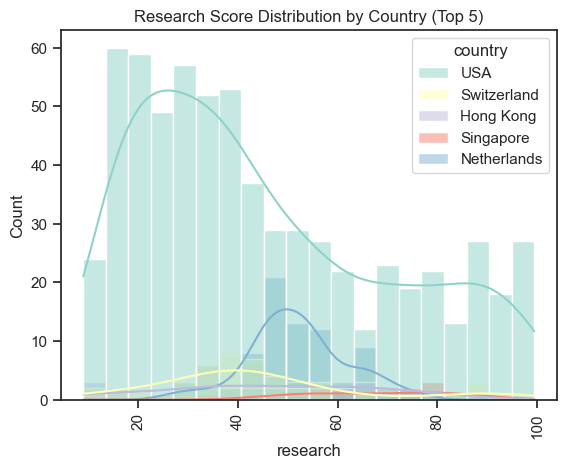

In [86]:
# Select the top 5 countries by research score
df_top_5_countries = df_times.groupby("country")["research"].mean().nlargest(5).index
df_top_5_countries_data = df_times[df_times["country"].isin(df_top_5_countries)]

# Create a histogram
sns.histplot(data=df_top_5_countries_data, x="research", hue="country", palette="Set3", kde=True, bins=20)
plt.title("Research Score Distribution by Country (Top 5)")
plt.xticks(rotation=90)
plt.show()